In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [92]:

data=pd.read_csv('data/pima.csv')

In [93]:
data.head()

6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

In [94]:
col=['pregnant','glucose','bp','skin','insulin_level','bmi','pedigree','age','diabetes_label']

In [95]:
data=pd.read_csv('data/pima.csv',names=col)

In [96]:
data.head()

pregnant  glucose  bp  skin  insulin_level   bmi  pedigree  age  \
0         6      148  72    35              0  33.6     0.627   50   
1         1       85  66    29              0  26.6     0.351   31   
2         8      183  64     0              0  23.3     0.672   32   
3         1       89  66    23             94  28.1     0.167   21   
4         0      137  40    35            168  43.1     2.288   33   

   diabetes_label  
0               1  
1               0  
2               1  
3               0  
4               1

In [97]:
data.tail()

pregnant  glucose  bp  skin  insulin_level   bmi  pedigree  age  \
763        10      101  76    48            180  32.9     0.171   63   
764         2      122  70    27              0  36.8     0.340   27   
765         5      121  72    23            112  26.2     0.245   30   
766         1      126  60     0              0  30.1     0.349   47   
767         1       93  70    31              0  30.4     0.315   23   

     diabetes_label  
763               0  
764               0  
765               0  
766               1  
767               0

In [98]:
data.count()

pregnant          768
glucose           768
bp                768
skin              768
insulin_level     768
bmi               768
pedigree          768
age               768
diabetes_label    768
dtype: int64

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   bp              768 non-null    int64  
 3   skin            768 non-null    int64  
 4   insulin_level   768 non-null    int64  
 5   bmi             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes_label  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
data.describe()

pregnant     glucose          bp        skin  insulin_level  \
count  768.000000  768.000000  768.000000  768.000000     768.000000   
mean     3.845052  120.894531   69.105469   20.536458      79.799479   
std      3.369578   31.972618   19.355807   15.952218     115.244002   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000   99.000000   62.000000    0.000000       0.000000   
50%      3.000000  117.000000   72.000000   23.000000      30.500000   
75%      6.000000  140.250000   80.000000   32.000000     127.250000   
max     17.000000  199.000000  122.000000   99.000000     846.000000   

              bmi    pedigree         age  diabetes_label  
count  768.000000  768.000000  768.000000      768.000000  
mean    31.992578    0.471876   33.240885        0.348958  
std      7.884160    0.331329   11.760232        0.476951  
min      0.000000    0.078000   21.000000        0.000000  
25%     27.300000    0.243750   24.000000        0.000000  
50%     32.000000    0.372500   29.000000        0.000000  
75%     36.600000    0.626250   41.000000        1.000000  
max     67.100000    2.420000   81.000000        1.000000

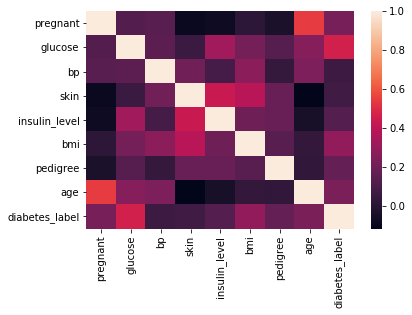

In [101]:
sns.heatmap(data.corr())

In [102]:
data.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin_level', 'bmi', 'pedigree',
       'age', 'diabetes_label'],
      dtype='object')

In [103]:
features=['pregnant','insulin_level', 'bmi',
       'age']

In [104]:
x=data[features]

y=data['diabetes_label']

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [106]:
print( x_train.shape,y_train.shape)

(576, 4) (576,)


In [107]:
print( x_test.shape,y_test.shape)

(192, 4) (192,)


In [108]:
model=LogisticRegression(max_iter=1000)

In [109]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
prediction=model.predict(x_test)

In [111]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: diabetes_label, Length: 192, dtype: int64

In [112]:
accuracy_score(y_test,prediction)

0.6770833333333334

In [113]:
y_test.value_counts()

0    130
1     62
Name: diabetes_label, dtype: int64

In [115]:
y_test.mean()

0.3229166666666667

In [125]:
print (f"true :{y_test.values[0:15]}")
print (f"prediction:{prediction[0:15]}")

true :[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0]
prediction:[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]


In [129]:
conf_matrix=confusion_matrix(y_test,prediction)

In [130]:
conf_matrix

array([[114,  16],
       [ 46,  16]])

In [132]:
# error=(FP+FN)/(TP+TN+FP+FN)

In [135]:
error=(conf_matrix[1][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])

In [141]:
error

0.3229166666666667

In [144]:
sensitivity=recall_score(y_test,prediction) # when our value is positive then how well is our prediction doing

In [145]:
sensitivity

0.25806451612903225

In [148]:
precision_score(y_test,prediction)

0.5

In [149]:
x=data.drop(['diabetes_label'],axis=1)

y=data['diabetes_label']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [168]:
model1=LogisticRegression(max_iter=170)

In [169]:
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=170,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
prediction=model1.predict(x_test)

In [171]:
accuracy_score(y_test,prediction)

0.796875

In [172]:
confusion_matrix(y_test,prediction)

array([[117,  13],
       [ 26,  36]])

In [173]:
precision_score(y_test,prediction)

0.7346938775510204